a)Train DNN using SGD and your choices of hyper-parameters, L, and $N_j$($j∈[J]$). Report the convergence rate on the training as well as the generalization performance. Feel free to change SGD to any other solver of your choice (give explanation for the choice).

In [ ]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.utils import to_categorical

In [ ]:
# Load and preprocess MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 784) / 255.0 # Normalize pixel values to [0, 1] and flatten images
X_test = X_test.reshape(-1, 784) / 255.0
y_train = to_categorical(y_train, num_classes=10) # Convert labels to one-hot encoded vectors
y_test = to_categorical(y_test, num_classes=10)



11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Define DNN architecture
model = Sequential()
model.add(Dense(units=256, activation='relu', input_dim=784)) # Layer 1 with 256 neurons and ReLU activation
model.add(Dense(units=128, activation='relu')) # Layer 2 with 128 neurons and ReLU activation
model.add(Dense(units=10, activation='softmax')) # Output layer with 10 neurons (for 10 classes) and Softmax activation



In [ ]:
# Compile model
learning_rate = 0.01 # Learning rate
sgd = SGD(lr=learning_rate) # SGD optimizer with specified learning rate
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])



/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
batch_size = 32 # Batch size for SGD
epochs = 10 # Number of epochs
losses = []
accuracies = []

for epoch in range(epochs):
    # Print current epoch
    print("Epoch {}/{}".format(epoch+1, epochs))
    
    # Train model for one epoch
    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=1, verbose=1)
    
    # Update loss and accuracy lists
    losses.append(history.history['loss'][0])
    accuracies.append(history.history['accuracy'][0])
    
    # Evaluate model on test dataset
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print("Test Loss: {:.4f}, Test Accuracy: {:.4f}".format(loss, accuracy))




Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0917 - accuracy: 0.9744
Test Loss: 0.1003, Test Accuracy: 0.9710
Epoch 2/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0845 - accuracy: 0.9759
Test Loss: 0.0979, Test Accuracy: 0.9703
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0782 - accuracy: 0.9781
Test Loss: 0.0913, Test Accuracy: 0.9737
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0726 - accuracy: 0.9792
Test Loss: 0.0892, Test Accuracy: 0.9730
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0674 - accuracy: 0.9809
Test Loss: 0.0852, Test Accuracy: 0.9735
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0630 - accuracy: 0.9828
Test Loss: 0.0847, Test Accuracy: 0.9749
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0589 - accuracy: 0.9839
Test Loss: 0.0804, Test Accuracy: 0.975

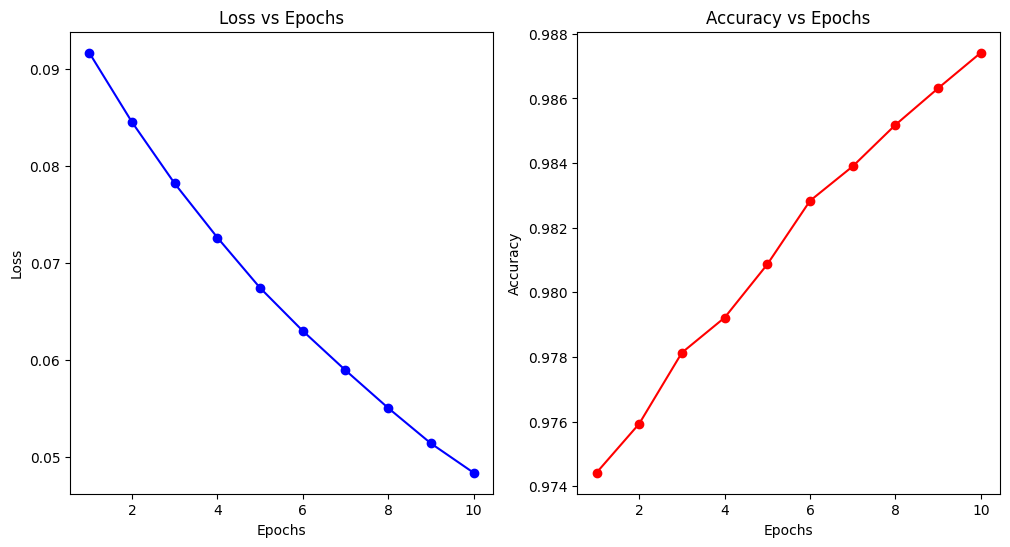

In [ ]:
# Plot loss and accuracy curves
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), losses, 'b-o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), accuracies, 'r-o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.show()






In [ ]:
from keras.optimizers import SGD, Adagrad, RMSprop
from keras.utils import to_categorical

In [ ]:
# Define DNN architecture
model = Sequential()
model.add(Dense(units=256, activation='relu', input_dim=784)) # Layer 1 with 256 neurons and ReLU activation
model.add(Dense(units=128, activation='relu')) # Layer 2 with 128 neurons and ReLU activation
model.add(Dense(units=10, activation='softmax')) # Output layer with 10 neurons (for 10 classes) and Softmax activation

In [ ]:
# Training with different adaptive learning rates
learning_rates = {'constant': 0.01, 'diminishing': 0.01, 'adagrad': 0.01, 'rmsprop': 0.001}

In [ ]:
losses_2 = {}
accuracies_2 = {}
for lr_type, learning_rate in learning_rates.items():
    # Print current adaptive learning rate type
    print("Adaptive Learning Rate Type: {}".format(lr_type))
    
    # Compile model with appropriate optimizer
    if lr_type == 'constant':
        optimizer = SGD(lr=learning_rate) # SGD with constant learning rate
    elif lr_type == 'diminishing':
        optimizer = SGD(lr=learning_rate, decay=1e-6) # SGD with diminishing learning rate
    elif lr_type == 'adagrad':
        optimizer = Adagrad(lr=learning_rate) # AdaGrad optimizer
    elif lr_type == 'rmsprop':
        optimizer = RMSprop(lr=learning_rate) # RMSProp optimizer
    
    
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Train model
    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1)
    
    # Update loss and accuracy lists
    losses_2[lr_type] = history.history['loss']
    accuracies_2[lr_type] = history.history['accuracy']
    
    # Evaluate model on test dataset
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print("Test Loss: {:.4f}, Test Accuracy: {:.4f}".format(loss, accuracy))


Adaptive Learning Rate Type: constant


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0939 - accuracy: 0.9735
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0868 - accuracy: 0.9755
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0803 - accuracy: 0.9776
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0750 - accuracy: 0.9790
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0699 - accuracy: 0.9803
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0654 - accuracy: 0.9818
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0613 - accuracy: 0.9833
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0578 - accuracy: 0.9847
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0544 - accuracy: 0.9851
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.051

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adagrad.py:84: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.0359 - accuracy: 0.9897
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0297 - accuracy: 0.9920
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0253 - accuracy: 0.9938
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0214 - accuracy: 0.9953
Epoch 5/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0193 - accuracy: 0.9959
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0169 - accuracy: 0.9967
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0152 - accuracy: 0.9974
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0136 - accuracy: 0.9979
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0123 - accuracy: 0.9982
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.011

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.0986 - accuracy: 0.9702
Epoch 2/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0713 - accuracy: 0.9793
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0584 - accuracy: 0.9835
Epoch 4/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0515 - accuracy: 0.9867
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0422 - accuracy: 0.9895
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0367 - accuracy: 0.9902
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0319 - accuracy: 0.9917
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0276 - accuracy: 0.9930
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0254 - accuracy: 0.9939
Epoch 10/10
1875/1875 [==============================] - 14s 8ms/step - l

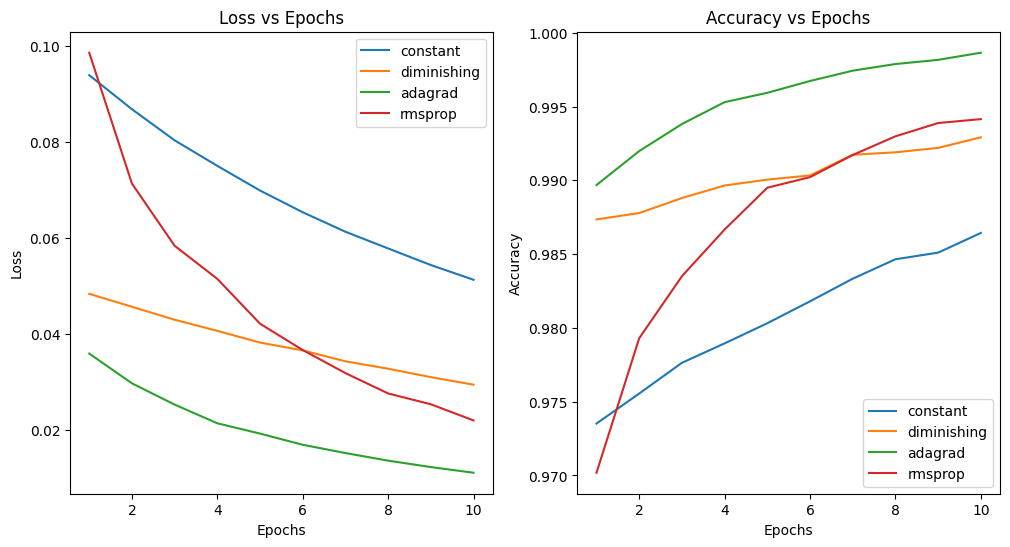

In [ ]:
# Plot loss and accuracy curves for different adaptive learning rates
plt.figure(figsize=(12, 6))
for lr_type in learning_rates.keys():
    plt.subplot(1, 2, 1)
    plt.plot(range(1, epochs+1), losses_2[lr_type], label=lr_type)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss vs Epochs')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(range(1,epochs+1), accuracies_2[lr_type], label=lr_type)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Epochs')
    plt.legend()

The AdaGrad optimizer is performing well in this case because it adapts the learning rate for each parameter during training, based on the history of gradients for that parameter. This adaptive learning rate helps AdaGrad to perform well in scenarios where there are sparse gradients or when there are different scales of gradients for different parameters. 

c)Consider design of part a) and fix Pj Nj. Investigate shallower networks (smaller J) each having potentially more neurons versus deeper network each having fewer neurons per layer, and discuss pros and cons of these two DNN architectures.


In [ ]:
import tensorflow as tf

# shallow network with more neurons per layer
def create_shallow_model(neurons_per_layer):
    model = Sequential()
    model.add(Dense(neurons_per_layer, activation='relu', input_shape=(784,)))
    model.add(Dense(neurons_per_layer, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

# deep network with fewer neurons per layer
def create_deep_model(neurons_per_layer):
    model = Sequential()
    model.add(Dense(neurons_per_layer, activation='relu', input_shape=(784,)))
    model.add(Dense(neurons_per_layer // 2, activation='relu'))
    model.add(Dense(neurons_per_layer // 2, activation='relu'))
    model.add(Dense(neurons_per_layer // 2, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model


def train_evaluate_model(model, x_train, y_train, x_test, y_test, batch_size, epochs):
    model.compile(optimizer=SGD(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))
    return history.history['loss'], history.history['val_loss'], history.history['accuracy'], history.history['val_accuracy']




In [ ]:
# Set hyperparameters
batch_size = 128
epochs = 20
neurons_per_layer_shallow = 256
neurons_per_layer_deep = 64



In [ ]:

shallow_model = create_shallow_model(neurons_per_layer_shallow)
shallow_loss, shallow_val_loss, shallow_accuracy, shallow_val_accuracy = train_evaluate_model(shallow_model, X_train, y_train, X_test, y_test, batch_size, epochs)



Epoch 1/20
469/469 [==============================] - 5s 11ms/step - loss: 1.2656 - accuracy: 0.7028 - val_loss: 0.5888 - val_accuracy: 0.8580
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 0.4879 - accuracy: 0.8740 - val_loss: 0.3947 - val_accuracy: 0.8922
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 0.3768 - accuracy: 0.8963 - val_loss: 0.3342 - val_accuracy: 0.9071
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 0.3309 - accuracy: 0.9073 - val_loss: 0.3021 - val_accuracy: 0.9128
Epoch 5/20
469/469 [==============================] - 4s 9ms/step - loss: 0.3025 - accuracy: 0.9148 - val_loss: 0.2816 - val_accuracy: 0.9183
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2819 - accuracy: 0.9209 - val_loss: 0.2656 - val_accuracy: 0.9231
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2657 - accuracy: 0.9248 - val_loss: 0.2542 - val_accuracy: 0.9280
Epoch

In [ ]:
# train deep network with fewer neurons per layer
deep_model = create_deep_model(neurons_per_layer_deep)
deep_loss, deep_val_loss, deep_accuracy, deep_val_accuracy = train_evaluate_model(deep_model, X_train, y_train, X_test, y_test, batch_size, epochs)



/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 1.7791 - accuracy: 0.4338 - val_loss: 0.9367 - val_accuracy: 0.7470
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.6461 - accuracy: 0.8170 - val_loss: 0.4639 - val_accuracy: 0.8685
Epoch 3/20
469/469 [==============================] - 3s 5ms/step - loss: 0.4117 - accuracy: 0.8813 - val_loss: 0.3455 - val_accuracy: 0.9011
Epoch 4/20
469/469 [==============================] - 2s 3ms/step - loss: 0.3368 - accuracy: 0.9014 - val_loss: 0.3028 - val_accuracy: 0.9134
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2971 - accuracy: 0.9122 - val_loss: 0.2723 - val_accuracy: 0.9227
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2692 - accuracy: 0.9210 - val_loss: 0.2500 - val_accuracy: 0.9262
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2469 - accuracy: 0.9272 - val_loss: 0.2319 - val_accuracy: 0.9354
Epoch 

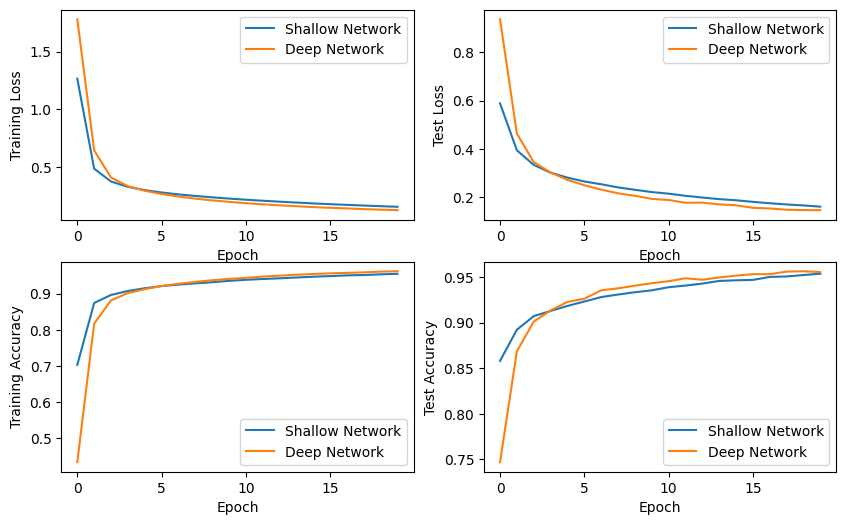

In [ ]:
# Plot loss and accuracy for shallow and deep networks
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.plot(shallow_loss, label='Shallow Network')
plt.plot(deep_loss, label='Deep Network')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()
plt.subplot(2, 2, 2)
plt.plot(shallow_val_loss, label='Shallow Network')
plt.plot(deep_val_loss, label='Deep Network')
plt.xlabel('Epoch')
plt.ylabel('Test Loss')
plt.legend()
plt.subplot(2, 2, 3)
plt.plot(shallow_accuracy, label='Shallow Network')
plt.plot(deep_accuracy, label='Deep Network')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend()
plt.subplot(2, 2, 4)
plt.plot(shallow_val_accuracy, label='Shallow Network')
plt.plot(deep_val_accuracy, label='Deep Network')
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.legend()


d)

d) Split the dataset to 6 random disjoint subsets, each for one worker, and repeat part a) on master-worker computational graph.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import SparseCategoricalAccuracy
import numpy as np

In [ ]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess data
x_train = x_train.reshape(-1, 784).astype('float32') / 255.0
x_test = x_test.reshape(-1, 784).astype('float32') / 255.0
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

# Split dataset into disjoint subsets for each worker
num_workers = 6
x_train_splits = np.array_split(x_train, num_workers)
y_train_splits = np.array_split(y_train, num_workers)




In [ ]:

def create_model():
    model = Sequential()
    model.add(Dense(256, activation='relu', input_shape=(784,)))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model



In [ ]:
# loop for master-worker computation
def train_model(model, x_train, y_train, optimizer, batch_size, num_epochs):
    for epoch in range(num_epochs):
        for i in range(num_workers):
            with tf.GradientTape() as tape:
                logits = model(x_train_splits[i])
                loss = tf.reduce_mean(tf.keras.losses.sparse_categorical_crossentropy(y_train_splits[i], logits, from_logits=True))
            grads = tape.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(grads, model.trainable_variables))

        if (epoch + 1) % 5 == 0:
            accuracy = SparseCategoricalAccuracy()
            accuracy.update_state(y_train, model(x_train))
            print("Epoch {}/{} - Loss: {:.4f} - Accuracy: {:.4f}".format(epoch + 1, num_epochs, loss.numpy(), accuracy.result().numpy()))



In [ ]:
model = create_model()
optimizer = SGD(lr=0.01)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model with master-worker computation
train_model(model, x_train, y_train, optimizer, batch_size=128, num_epochs=20)



Epoch 5/20 - Loss: 2.1346 - Accuracy: 0.3423
Epoch 10/20 - Loss: 1.9450 - Accuracy: 0.5881
Epoch 15/20 - Loss: 1.7462 - Accuracy: 0.6978
Epoch 20/20 - Loss: 1.5401 - Accuracy: 0.7442


In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), loss, 'b-o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), accuracy, 'r-o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.show()



In [ ]:
# Evaluate model
accuracy = SparseCategoricalAccuracy()
accuracy.update_state(y_test, model(x_test))
print("Test Accuracy: {:.4f}".format(accuracy.result().numpy()))

Test Accuracy: 0.7264
